In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [29]:
path = 'Data/angels_survey.csv'
answers_df = pd.read_csv(path)

display(answers_df)

,timestamp,day_born,olympic_sport,fight_or_flight,love_touch,love_words,love_service,love_time,love_gifts,height
0,10/17/2024 12:51:34,12/28/2001,Badminton,Run,3,3,4,5,3,168
1,10/17/2024 12:51:50,10/5/1998,Archery,Freeze,4,5,3,4,2,176
2,10/17/2024 12:52:12,6/9/2003,Skateboarding,Run,4,3,5,5,2,183
3,10/17/2024 12:52:19,5/2/1998,Swimming,Freeze,5,4,4,4,2,171
4,10/17/2024 12:57:47,1/9/2001,Tennis,Run,4,1,3,5,4,163
5,10/17/2024 13:05:06,6/7/2002,Badminton,Fight,2,4,4,4,5,163
6,10/17/2024 13:08:45,3/6/2000,Sailing,Run,4,5,4,5,4,170
7,10/17/2024 13:20:22,5/4/1997,Diving,Run,2,5,5,4,4,168
8,10/17/2024 13:28:11,1/25/1999,Gymnastics,Run,3,4,5,4,1,178
9,10/17/2024 13:30:21,7/11/1998,Volleyball,Run,4,3,4,4,3,180


In [30]:
runners_list = answers_df[[runner for runner in answers_df.fight_or_flight == 'Run']]
# print(runners_list)

runners_love_gifts = runners_list['love_gifts'].tolist().count(5)
runners_love_time = runners_list['love_time'].tolist().count(5)
runners_dont_love_time = runners_list['love_time'].tolist().count(1)
runners_love_touch = runners_list['love_touch'].tolist().count(5)
runners_love_words = runners_list['love_words'].tolist().count(5)
runners_love_service = runners_list['love_service'].tolist().count(5)

print(runners_love_service)



5


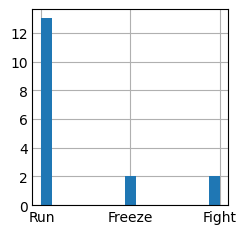

In [31]:
#histogram

plt.style.use('_mpl-gallery')
x = np.arange(0,260,20)
y = np.vstack([runners_list['love_time'], runners_list['love_gifts'], runners_list['love_touch']])

plt.hist(answers_df.fight_or_flight, bins=17)

plt.show()

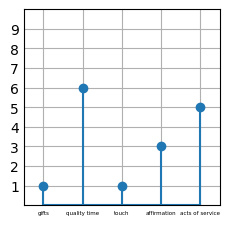

1 6 1 3 5


In [72]:
#stem chart -- most runners love quality time + acts of service!

# make data
x = 0.5 + np.arange(5)
y = [runners_love_gifts, runners_love_time, runners_love_touch, runners_love_words, runners_love_service]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 5), xticks=np.arange(0.5, 5.5),
       ylim=(0, 10), yticks=np.arange(1, 10))

x_tick_labels = ['gifts', 'quality time', 'touch', 'affirmation', 'acts of service']
ax.set_xticklabels(x_tick_labels, rotation='horizontal', fontsize=4)

plt.show()

print(runners_love_gifts, runners_love_time, runners_love_touch, runners_love_words, runners_love_service)

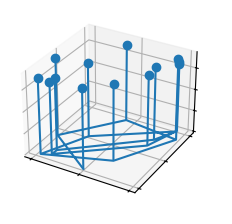

0 5
1 6


In [141]:
#3D stem graph! -- I've realised that this graph is not a great way to represent unrelated sets of data
#also realised that this data looks much better without multiplying the x + y values by sin/cosine
runners_height = runners_list['height'].tolist()
runners_hate_time = runners_list['love_time'].tolist().count(1)
runners_hate_service = runners_list['love_service'].tolist().count(1)
# print(runners_rank_time, runners_height)
# print(max(runners_height))

n = len(runners_list)
x = np.sin(np.linspace(runners_hate_time, runners_love_time*np.pi, n))
y = np.cos(np.linspace(runners_hate_service, runners_love_service*np.pi, n))
z = np.linspace(min(runners_height), max(runners_height), n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.stem(x, y, z)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()
print(runners_hate_service, runners_love_service)
print(runners_hate_time, runners_love_time)


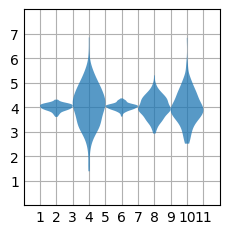

In [35]:
#violin plot -- I tried this because I thought it would show a good distribution of values, unsure if it was the best use case!

scale = 7
D = np.random.normal((4, 4, 4, 4, 4), (runners_love_gifts/scale,
                                       runners_love_time/scale,
                                       runners_love_touch/scale,
                                       runners_love_words/scale,
                                       runners_love_service/scale), (200, 5)) 
#normalparameters = ({CenterPointY}, {Scale}, {Size, # of shapes})

fig, ax = plt.subplots()
vp = ax.violinplot(D, [2, 4, 6, 8, 10], widths=2, 
                   showmeans=False, showmedians=False, showextrema=False)

for body in vp['bodies']:
    body.set_alpha(0.75)
ax.set(xlim=(0, 12), xticks=np.arange(1, 12),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()
